In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Import dataset and display first 5 rows
df = pd.read_csv("tvmarketing.csv")
print("First 5 rows:\n", df.head())

First 5 rows:
       TV  Sales
0  230.1   22.1
1   44.5   10.4
2   17.2    9.3
3  151.5   18.5
4  180.8   12.9


In [3]:
print("\nData types:\n", df.dtypes)


Data types:
 TV       float64
Sales    float64
dtype: object


In [4]:
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
                TV       Sales
count  200.000000  200.000000
mean   147.042500   14.022500
std     85.854236    5.217457
min      0.700000    1.600000
25%     74.375000   10.375000
50%    149.750000   12.900000
75%    218.825000   17.400000
max    296.400000   27.000000


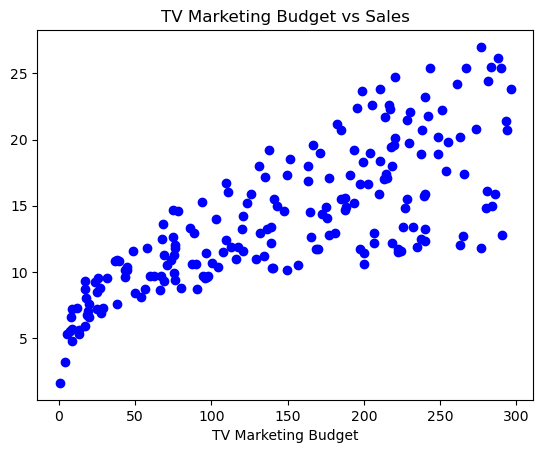

In [7]:
plt.scatter(df['TV'], df['Sales'], color='blue')
plt.xlabel('TV Marketing Budget')
plt.ylabel('Sales')
plt.title('TV Marketing Budget vs Sales')
plt.show()

In [9]:
X = df[['TV']]
y = df['Sales']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
print("\nTrain Data Shape:", X_train.shape, y_train.shape)
print("Test Data Shape:", X_test.shape, y_test.shape)


Train Data Shape: (140, 1) (140,)
Test Data Shape: (60, 1) (60,)


In [12]:
print("\nTrain Data Shape:", X_train.shape, y_train.shape)
print("Test Data Shape:", X_test.shape, y_test.shape)


Train Data Shape: (140, 1) (140,)
Test Data Shape: (60, 1) (60,)


In [13]:
n = len(X_train)
X_mean = X_train.mean().values[0]
y_mean = y_train.mean()
m = sum((X_train['TV'] - X_mean) * (y_train - y_mean)) / sum((X_train['TV'] - X_mean) ** 2)
b = y_mean - m * X_mean
print("\nManual Linear Regression Coefficients:")
print("Slope (m):", m)
print("Intercept (b):", b)



Manual Linear Regression Coefficients:
Slope (m): 0.04640780212815275
Intercept (b): 7.23945983075114


In [14]:
y_pred_manual = m * X_test['TV'] + b

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
print("\nSklearn Linear Regression Coefficients:")
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])


Sklearn Linear Regression Coefficients:
Intercept: 7.23945983075114
Coefficient: 0.04640780212815275


In [17]:
y_pred_sklearn = model.predict(X_test)

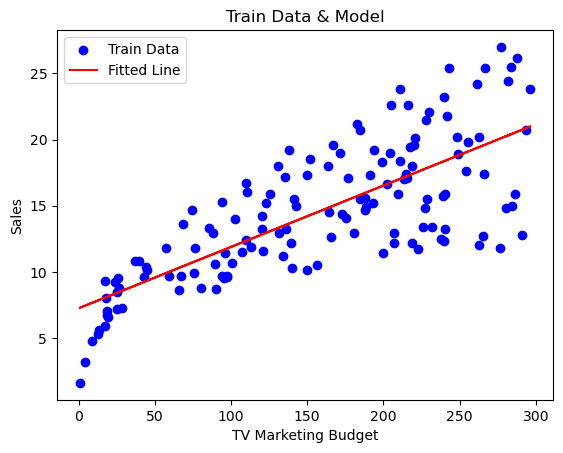

In [18]:
plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.plot(X_train, model.predict(X_train), color='red', label='Fitted Line')
plt.xlabel('TV Marketing Budget')
plt.ylabel('Sales')
plt.title('Train Data & Model')
plt.legend()
plt.show()


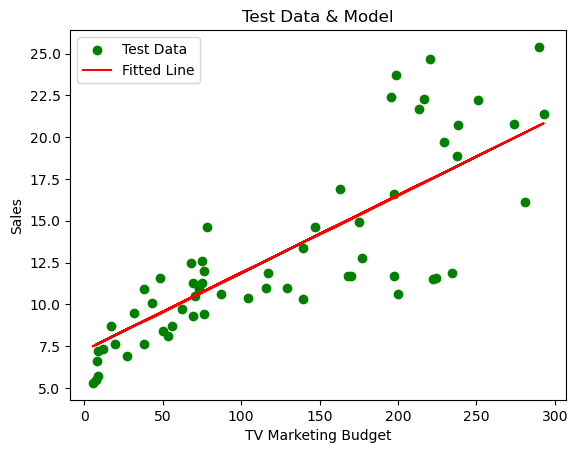

In [19]:
plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.plot(X_test, model.predict(X_test), color='red', label='Fitted Line')
plt.xlabel('TV Marketing Budget')
plt.ylabel('Sales')
plt.title('Test Data & Model')
plt.legend()
plt.show()

In [20]:
mse = mean_squared_error(y_test, y_pred_sklearn)
r2 = r2_score(y_test, y_pred_sklearn)
print("\nMean Squared Error:", mse)
print("R Squared Value:", r2)


Mean Squared Error: 8.970991242413616
R Squared Value: 0.6714477229302764


In [21]:
ss_total = sum((y_test - y_test.mean())**2)
ss_residual = sum((y_test - y_pred_manual)**2)
manual_r2 = 1 - (ss_residual / ss_total)
adjusted_r2 = 1 - (1 - manual_r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

In [22]:
print("\nManual R Squared:", manual_r2)
print("Manual Adjusted R Squared:", adjusted_r2)


Manual R Squared: 0.6714477229302764
Manual Adjusted R Squared: 0.6657830284980398
